# Segundo notebook de graficación
- Óscar A. Alvarado Morán
- Oscar A. Esquivel-Flores

---

Lo que sabemos de graficación ya podemos llevarlo a la estadística ...
## StastPlots

Para esto no hay imagen :c

`StatsPlots.jl` es una biblioteca de _recipes_ (o recetas), tiene entonces muchas recetas de cómo interpretar comandos de graficación, por ejemplo, nos dirá cómo usar las `Distribuciones`.

In [ ]:
#using Pkg; Pkg.add("Distributions")
using Distributions
plot(Normal(0,1), lw = 3)

#### Justo vemos que necesitamos usar StatPlots porque no se le puede pasar lo que querramos!

In [ ]:
#import Pkg; Pkg.add("StatsPlots")
using StatsPlots
μ = 0
σ = 1
plot(Normal(μ, σ), lw = 3)

In [ ]:
x = randn(1024)
y = randn(1024)
@which marginalkde(x, x+y)

In [ ]:
@which Gamma(2)

In [ ]:
dist = Gamma(2)
scatter(dist, leg=false)
bar!(dist, alpha=0.3)

In [ ]:
x = randn(1024)
y = randn(1024)
marginalkde(x, x+y)

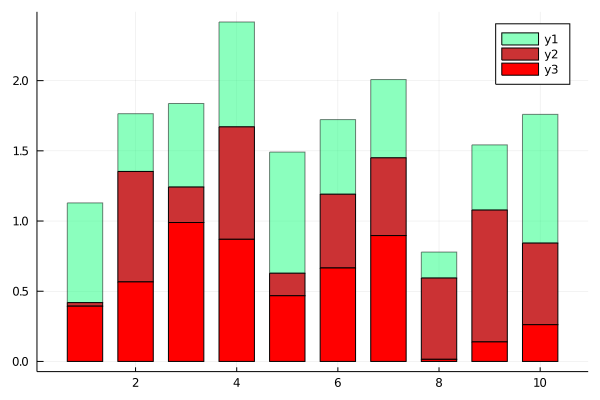

In [19]:
groupedbar(rand(10,3), bar_position = :stack, bar_width=0.7, c = [RGB(0.1,1,0.5) "#CB3234" :red], alpha = [0.5 1 1])

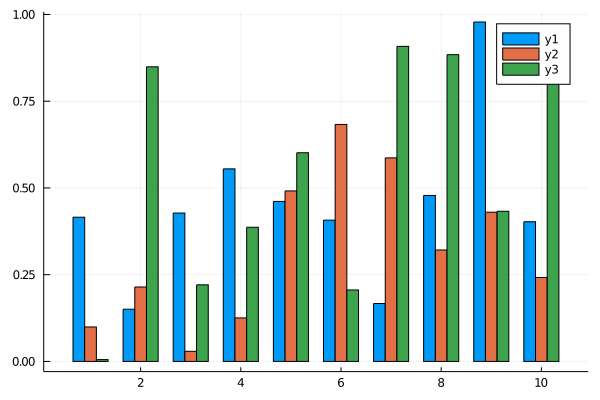

In [20]:
groupedbar(rand(10,3), bar_width=0.7) # bar_position = :dodge

---

Ahora sí pasamos a lo chido ...

## Plotly

<p align="center">
    <a href="http://juliaplots.org/PlotlyJS.jl/stable/" />
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/37/Plotly-logo-01-square.png/1200px-Plotly-logo-01-square.png" width=500 height=500/>
</p>

### Antes de hacer esto, tirar el siguiente comando en la terminal (si es posible, en un entorno nuevo, para no romper el ambiente _base_) :

`$ pip install jupyter_contrib_nbextensions`

In [ ]:
#import Pkg; Pkg.add("WebIO")

In [1]:
using WebIO

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-1097143774073198997\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-10281328623618907384\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-1097143774073198997\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [2]:
WebIO.install_jupyter_nbextension()

┌ Info: Installing Jupyter WebIO extension...
│   cmd = `/home/oscar/anaconda3/envs/taller/bin/jupyter nbextension install --user /home/oscar/.julia/packages/WebIO/Fy9h1/deps/bundles/webio-jupyter-notebook.js`
└ @ WebIO /home/oscar/.julia/packages/WebIO/Fy9h1/deps/jupyter.jl:237
Up to date: /home/oscar/.local/share/jupyter/nbextensions/webio-jupyter-notebook.js

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable <the entry point> --user
    
┌ Info: Enabling Jupyter WebIO extension...
│   cmd = `/home/oscar/anaconda3/envs/taller/bin/jupyter nbextension enable --user webio-jupyter-notebook`
└ @ WebIO /home/oscar/.julia/packages/WebIO/Fy9h1/deps/jupyter.jl:241
Enabling notebook extension webio-jupyter-notebook...
      - Validating: OK


In [3]:
#import Pkg; Pkg.add("Plotly")
using Plotly

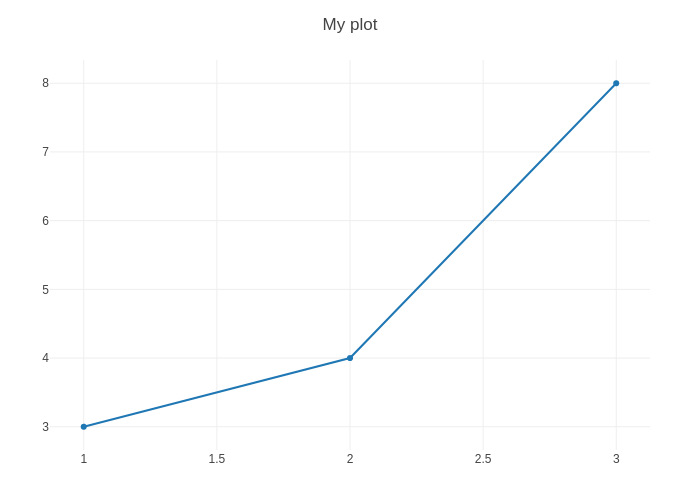

In [30]:
coordenadas = Plotly.scatter(x = [1, 2, 3], y = [3, 4, 8])
my_plot = Plotly.plot([coordenadas], Layout(title="My plot"))

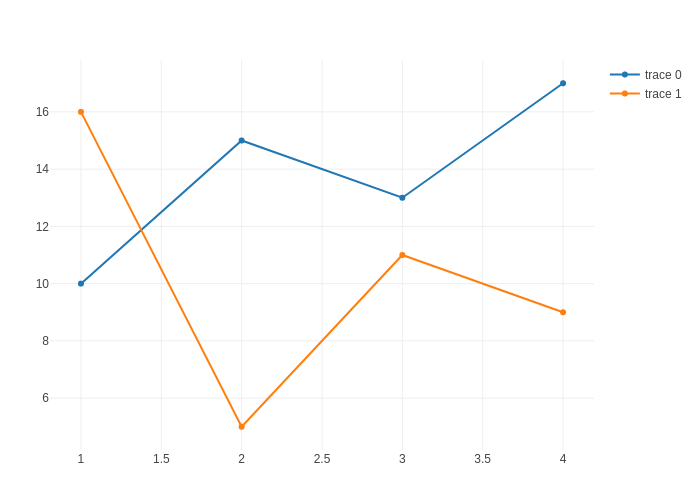

In [4]:
trace1 = scatter(x = [1, 2, 3, 4], y = [10, 15, 13, 17])
trace2 = scatter(x = [1, 2, 3, 4], y = [16, 5, 11, 9])

plot([trace1, trace2])

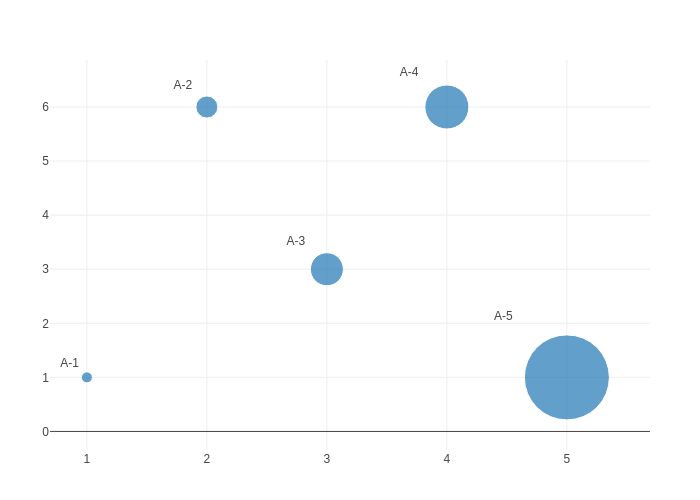

In [9]:
fields = Dict{Symbol,Any}(:type => "scatter",
                          :x => [1, 2, 3, 4, 5],
                          :y => [1, 6, 3, 6, 1],
                          :mode => "markers+text",
                          :name => "Team A",
                          :text => ["A-1", "A-2", "A-3", "A-4", "A-5"],
                          :textposition => "top left",
                          :textfont => Dict(:family =>  "Raleway, sans-serif"),
                          :marker => Dict(:size => [11,22,33,44,85]))
a = GenericTrace("scatter", fields)
plot(a)

In [10]:
t1 = scatter(x=[1, 2, 3, 4, 5],
              y=[1, 6, 3, 6, 1],
              mode="markers+text",
              name="Team A",
              text=["A-1", "A-2", "A-3", "A-4", "A-5"],
              textposition="top center",
              textfont_family="Raleway, sans-serif",
              marker_size=12)

scatter with fields marker, mode, name, text, textfont, textposition, type, x, and y


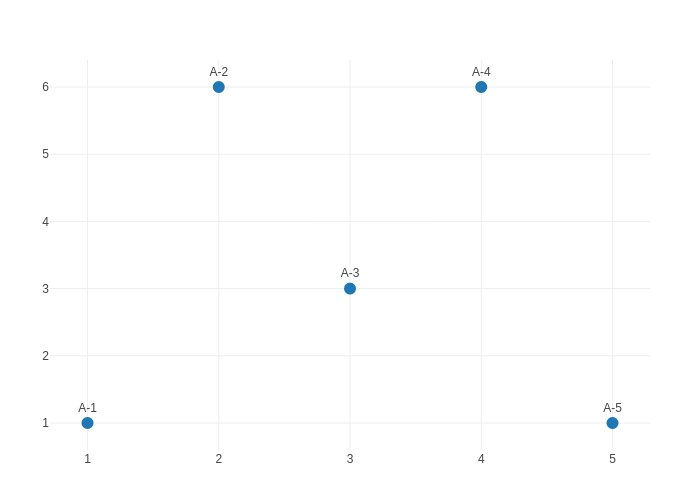

In [11]:
plot(t1)

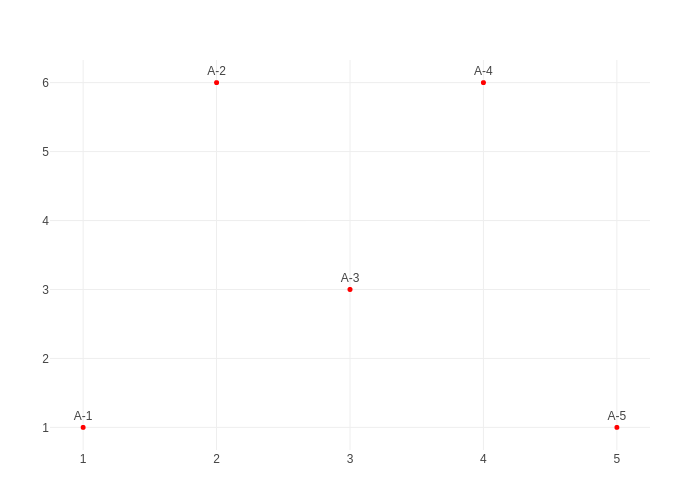

In [13]:
t1["marker_color"] = "red"
t1["marker_size"] = 5
plot(t1)

In [14]:
function batman()
    # reference: https://github.com/alanedelman/18.337_2015/blob/master/Lecture01_0909/The%20Bat%20Curve.ipynb
    σ(x) = @. √(1-x^2)
    el(x) = @. 3*σ(x/7)
    s(x) = @. 4.2 - 0.5*x - 2.0*σ(0.5*x-0.5)
    b(x) = @. σ(abs(2-x)-1) - x^2/11 + 0.5x - 3
    c(x) = [1.7, 1.7, 2.6, 0.9]

    p(i, f; kwargs...) = scatter(;x=[-i; 0.0; i], y=[f(i); NaN; f(i)],
                                  marker_color="black", showlegend=false,
                                  kwargs...)
    traces = vcat(p(3:0.1:7, el; name="wings 1"),
                  p(4:0.1:7, t->-el(t); name="wings 2"),
                  p(1:0.1:3, s; name="Shoulders"),
                  p(0:0.1:4, b; name="Bottom"),
                  p([0, 0.5, 0.8, 1], c; name="head"))

    plot(traces, Layout(title="Batman"))
end

batman (generic function with 1 method)

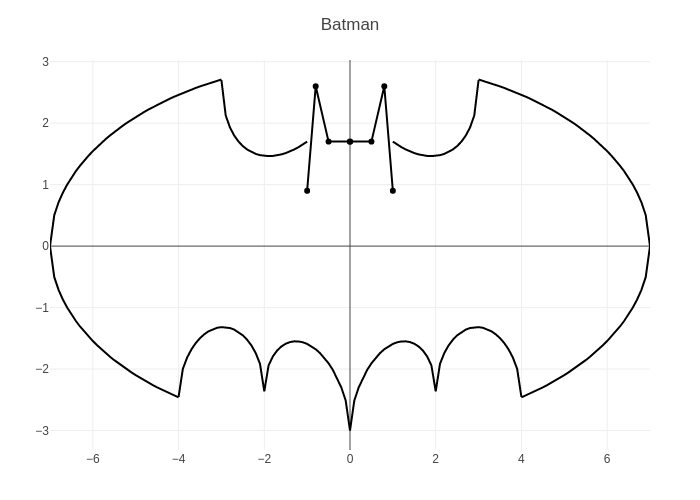

In [15]:
batman()

In [ ]:
#using Pkg; Pkg.add("CSV")
using CSV
using DataFrames

In [ ]:
# reference: https://plot.ly/r/dumbbell-plots/
# read Data into dataframe
nm = tempname()
url = "https://raw.githubusercontent.com/plotly/datasets/master/school_earnings.csv"
download(url, nm)
df = CSV.read(nm, DataFrame)
rm(nm)

# sort dataframe by male earnings
df = sort(df, :Men, rev=false)

men = scatter(;y=df[:School], x=df[:Men], mode="markers", name="Men",
               marker=attr(color="blue", size=12))
women = scatter(;y=df[:School], x=df[:Women], mode="markers", name="Women",
                 marker=attr(color="pink", size=12))

lines = map(eachrow(df)) do r
    scatter(y=fill(r[:School], 2), x=[r[:Women], r[:Men]], mode="lines",
            name=r[:School], showlegend=false, line_color="gray")
end

data = Base.typed_vcat(GenericTrace, men, women, lines)
layout = Layout(width=650, height=650, margin_l=100, yaxis_title="School",
                xaxis_title="Annual Salary (thousands)",
                title="Gender earnings disparity")

plot(data, layout)

In [ ]:
#using Pkg; Pkg.add("PlotlyJS")
using PlotlyJS

In [ ]:
function datetimestrings()
    x = ["2013-10-04 22:23:00", "2013-11-04 22:23:00", "2013-12-04 22:23:00"]
    plot(scatter(x=x, y=[1 ,3, 6]))
end

In [ ]:
datetimestrings()

In [ ]:
trace0 = scatter(;x=1:4, y=[0, 2, 3, 5], fill="tozeroy")
trace1 = scatter(;x=1:4, y=[3, 5, 1, 7], fill="tonexty")
p2 = plot([trace0, trace1])

In [ ]:
trace1 = [
  "x" => [1, 2, 3],
  "y" => [4, 5, 6],
  "type" => "scatter"
]
trace2 = [
  "x" => [20, 30, 40],
  "y" => [50, 60, 70],
  "xaxis" => "x2",
  "yaxis" => "y2",
  "type" => "scatter"
]
data = [trace1, trace2]
layout = [
  "xaxis" => ["domain" => [0, 0.7]],
  "yaxis2" => ["anchor" => "x2"],
  "xaxis2" => ["domain" => [0.8, 1]]
]
response = plot(data, ["layout" => layout, "filename" => "custom-size-subplot", "fileopt" => "overwrite"])

In [ ]:
trace1 = [
  "x" => [1, 2, 3],
  "y" => [4, 5, 6],
  "type" => "scatter"
]
trace2 = [
  "x" => [20, 30, 40],
  "y" => [50, 60, 70],
  "xaxis" => "x2",
  "yaxis" => "y2",
  "type" => "scatter"
]
trace3 = [
  "x" => [300, 400, 500],
  "y" => [600, 700, 800],
  "xaxis" => "x3",
  "yaxis" => "y3",
  "type" => "scatter"
]
trace4 = [
  "x" => [4000, 5000, 6000],
  "y" => [7000, 8000, 9000],
  "xaxis" => "x4",
  "yaxis" => "y4",
  "type" => "scatter"
]
data = [trace1, trace2, trace3, trace4]
layout = [
  "xaxis" => ["domain" => [0, 0.45]],
  "yaxis" => ["domain" => [0, 0.45]],
  "xaxis4" => [
    "domain" => [0.55, 1],
    "anchor" => "y4"
  ],
  "xaxis3" => [
    "domain" => [0, 0.45],
    "anchor" => "y3"
  ],
  "xaxis2" => ["domain" => [0.55, 1]],
  "yaxis2" => [
    "domain" => [0, 0.45],
    "anchor" => "x2"
  ],
  "yaxis3" => ["domain" => [0.55, 1]],
  "yaxis4" => [
    "domain" => [0.55, 1],
    "anchor" => "x4"
  ]
]

response = plot(data)#, ["layout" => layout, "filename" => "multiple-subplots", "fileopt" => "overwrite"])

In [ ]:
trace1 = [
  "x" => [1, 2, 3],
  "y" => [4, 5, 6],
  "type" => "scatter"
]
trace2 = [
  "x" => [20, 30, 40],
  "y" => [50, 60, 70],
  "xaxis" => "x2",
  "yaxis" => "y2",
  "type" => "scatter"
]
data = [trace1, trace2]
layout = [
  "xaxis" => ["domain" => [0, 0.45]],
  "yaxis2" => ["anchor" => "x2"],
  "xaxis2" => ["domain" => [0.55, 1]]
]
response = Plotly.plot(data, ["layout" => layout, "filename" => "simple-subplot", "fileopt" => "overwrite"])

In [ ]:
t = -1:0.01:1.2
x = t.^3+0.3*randn(length(t))
y = t.^6+0.3*randn(length(t))


trace1 = [
  "x" => x,
  "y" => y,
  "mode" => "markers",
  "name" => "points",
  "marker" => [
    "color" => "rgb(102,0,0)",
    "size" => 2,
    "opacity" => 0.4
  ],
  "type" => "scatter"
]
trace2 = [
  "x" => x,
  "y" => y,
  "name" => "density",
  "ncontours" => 20,
  "colorscale" => "Hot",
  "reversescale" => true,
  "showscale" => false,
  "type" => "histogram2dcontour"
]
trace3 = [
  "x" => x,
  "name" => "x density",
  "marker" => ["color" => "rgb(102,0,0)"],
  "yaxis" => "y2",
  "type" => "histogram"
]
trace4 = [
  "y" => y,
  "name" => "y density",
  "marker" => ["color" => "rgb(102,0,0)"],
  "xaxis" => "x2",
  "type" => "histogram"
]
data = [trace1, trace2, trace3, trace4]
layout = [
  "showlegend" => false,
  "autosize" => false,
  "width" => 600,
  "height" => 550,
  "xaxis" => [
    "domain" => [0, 0.85],
    "showgrid" => false,
    "zeroline" => false
  ],
  "yaxis" => [
    "domain" => [0, 0.85],
    "showgrid" => false,
    "zeroline" => false
  ],
  "margin" => ["t" => 50],
  "hovermode" => "closest",
  "bargap" => 0,
  "xaxis2" => [
    "domain" => [0.85, 1],
    "showgrid" => false,
    "zeroline" => false
  ],
  "yaxis2" => [
    "domain" => [0.85, 1],
    "showgrid" => false,
    "zeroline" => false
  ]
]
response = Plotly.plot(data)#, ["layout" => layout, "filename" => "2dhistogram-contour-subplots", 
        "fileopt" => "overwrite"])

## Unas grafiquitas chidas: [Plotly](http://juliaplots.org/PlotlyJS.jl/stable/examples/3d/)

In [16]:
#using Pkg; Pkg.add(["RDatasets", "Colors"])
using PlotlyJS, DataFrames, RDatasets, Colors, Distributions, LinearAlgebra

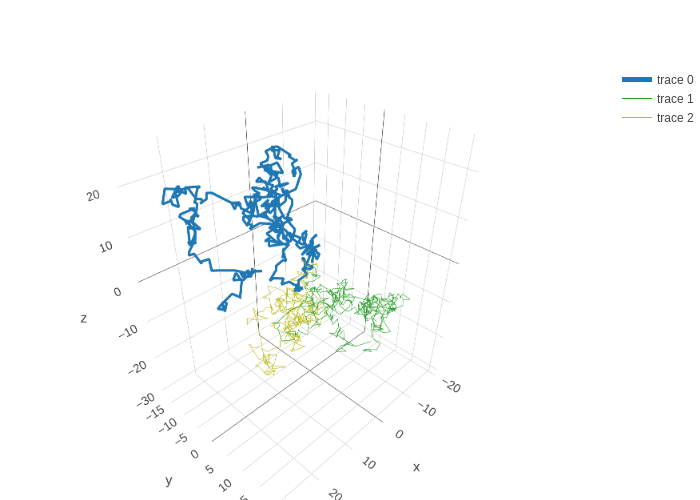

In [17]:
n = 400
rw() = cumsum(randn(n))
trace1 = scatter3d(;x=rw(),y=rw(), z=rw(), mode="lines",
                    marker=attr(color="#1f77b4", size=12, symbol="circle",
                                line=attr(color="rgb(0,0,0)", width=0)),
                    line=attr(color="#1f77b4", width=5))
trace2 = scatter3d(;x=rw(),y=rw(), z=rw(), mode="lines",
                    marker=attr(color="#9467bd", size=12, symbol="circle",
                                line=attr(color="rgb(0,0,0)", width=0)),
                    line=attr(color="rgb(44, 160, 44)", width=1))
trace3 = scatter3d(;x=rw(),y=rw(), z=rw(), mode="lines",
                    marker=attr(color="#bcbd22", size=12, symbol="circle",
                                line=attr(color="rgb(0,0,0)", width=0)),
                    line=attr(color="#bcbd22", width=1))
layout = Layout(autosize=false, width=500, height=500,
                margin=attr(l=0, r=0, b=0, t=65))
plot([trace1, trace2, trace3], layout)

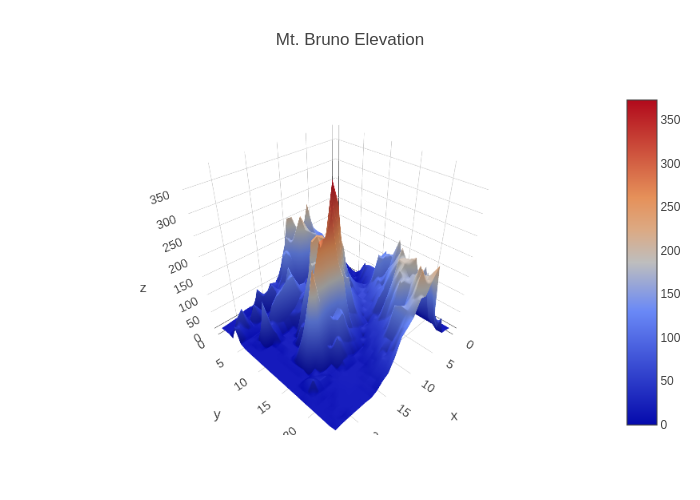

In [18]:
z = Vector[[27.80985, 49.61936, 83.08067, 116.6632, 130.414, 150.7206, 220.1871,
            156.1536, 148.6416, 203.7845, 206.0386, 107.1618, 68.36975, 45.3359,
            49.96142, 21.89279, 17.02552, 11.74317,   14.75226, 13.6671, 5.677561,
            3.31234, 1.156517, -0.147662],
           [27.71966, 48.55022, 65.21374, 95.27666, 116.9964, 133.9056, 152.3412,
            151.934, 160.1139, 179.5327, 147.6184, 170.3943, 121.8194, 52.58537,
            33.08871, 38.40972, 44.24843, 69.5786, 4.019351, 3.050024, 3.039719,
            2.996142, 2.967954, 1.999594],
           [30.4267, 33.47752, 44.80953, 62.47495, 77.43523, 104.2153, 102.7393, 137.0004,
            186.0706, 219.3173, 181.7615, 120.9154, 143.1835, 82.40501, 48.47132,
            74.71461, 60.0909, 7.073525, 6.089851, 6.53745, 6.666096, 7.306965, 5.73684,
            3.625628],
           [16.66549, 30.1086, 39.96952, 44.12225, 59.57512, 77.56929, 106.8925,
            166.5539, 175.2381, 185.2815, 154.5056, 83.0433, 62.61732, 62.33167,
            60.55916, 55.92124, 15.17284, 8.248324, 36.68087, 61.93413, 20.26867,
            68.58819, 46.49812, 0.2360095],
           [8.815617, 18.3516, 8.658275, 27.5859, 48.62691, 60.18013, 91.3286,
            145.7109, 116.0653, 106.2662, 68.69447, 53.10596, 37.92797, 47.95942,
            47.42691, 69.20731, 44.95468, 29.17197, 17.91674, 16.25515, 14.65559,
            17.26048, 31.22245, 46.71704],
           [6.628881, 10.41339, 24.81939, 26.08952, 30.1605, 52.30802, 64.71007,
            76.30823, 84.63686, 99.4324, 62.52132, 46.81647, 55.76606, 82.4099,
            140.2647, 81.26501, 56.45756, 30.42164, 17.28782, 8.302431, 2.981626,
            2.698536, 5.886086, 5.268358],
           [21.83975, 6.63927, 18.97085, 32.89204, 43.15014, 62.86014, 104.6657,
            130.2294, 114.8494, 106.9873, 61.89647, 55.55682, 86.80986, 89.27802,
            122.4221, 123.9698, 109.0952, 98.41956, 77.61374, 32.49031, 14.67344,
            7.370775, 0.03711011, 0.6423392],
           [53.34303, 26.79797, 6.63927, 10.88787, 17.2044, 56.18116, 79.70141,
            90.8453, 98.27675, 80.87243, 74.7931, 75.54661, 73.4373, 74.11694, 68.1749,
            46.24076, 39.93857, 31.21653, 36.88335, 40.02525, 117.4297, 12.70328,
            1.729771, 0],
           [25.66785, 63.05717, 22.1414, 17.074, 41.74483, 60.27227, 81.42432, 114.444,
            102.3234, 101.7878, 111.031, 119.2309, 114.0777, 110.5296, 59.19355,
            42.47175, 14.63598, 6.944074, 6.944075, 27.74936, 0, 0, 0.09449376, 0.07732264],
           [12.827, 69.20554, 46.76293, 13.96517, 33.88744, 61.82613, 84.74799,
            121.122, 145.2741, 153.1797, 204.786, 227.9242, 236.3038, 228.3655,
            79.34425, 25.93483, 6.944074, 6.944074, 6.944075, 7.553681, 0, 0, 0, 0],
           [0, 68.66396, 59.0435, 33.35762, 47.45282, 57.8355, 78.91689, 107.8275,
            168.0053, 130.9597, 212.5541, 165.8122, 210.2429, 181.1713, 189.7617,
            137.3378, 84.65395, 8.677168, 6.956576, 8.468093, 0, 0, 0, 0],
           [0, 95.17499, 80.03818, 59.89862, 39.58476, 50.28058, 63.81641, 80.61302,
            66.37824, 198.7651, 244.3467, 294.2474, 264.3517, 176.4082, 60.21857,
            77.41475, 53.16981, 56.16393, 6.949235, 7.531059, 3.780177, 0, 0, 0],
           [0, 134.9879, 130.3696, 96.86325, 75.70494, 58.86466, 57.20374, 55.18837,
            78.128, 108.5582, 154.3774, 319.1686, 372.8826, 275.4655, 130.2632, 54.93822,
            25.49719, 8.047439, 8.084393, 5.115252, 5.678269, 0, 0, 0],
           [0, 48.08919, 142.5558, 140.3777, 154.7261, 87.9361, 58.11092, 52.83869,
            67.14822, 83.66798, 118.9242, 150.0681, 272.9709, 341.1366, 238.664, 190.2,
            116.8943, 91.48672, 14.0157, 42.29277, 5.115252, 0, 0, 0],
           [0, 54.1941, 146.3839, 99.48143, 96.19411, 102.9473, 76.14089, 57.7844,
            47.0402, 64.36799, 84.23767, 162.7181, 121.3275, 213.1646, 328.482,
            285.4489, 283.8319, 212.815, 164.549, 92.29631, 7.244015, 1.167, 0, 0],
           [0, 6.919659, 195.1709, 132.5253, 135.2341, 89.85069, 89.45549, 60.29967,
            50.33806, 39.17583, 59.06854, 74.52159, 84.93402, 187.1219, 123.9673,
            103.7027, 128.986, 165.1283, 249.7054, 95.39966, 10.00284, 2.39255, 0, 0],
           [0, 21.73871, 123.1339, 176.7414, 158.2698, 137.235, 105.3089, 86.63255, 53.11591,
            29.03865, 30.40539, 39.04902, 49.23405, 63.27853, 111.4215, 101.1956,
            40.00962, 59.84565, 74.51253, 17.06316, 2.435141, 2.287471, -0.0003636982, 0],
           [0, 0, 62.04672, 136.3122, 201.7952, 168.1343, 95.2046, 58.90624, 46.94091,
            49.27053, 37.10416, 17.97011, 30.93697, 33.39257, 44.03077, 55.64542,
            78.22423, 14.42782, 9.954997, 7.768213, 13.0254, 21.73166, 2.156372,
            0.5317867],
           [0, 0, 79.62993, 139.6978, 173.167, 192.8718, 196.3499, 144.6611, 106.5424,
            57.16653, 41.16107, 32.12764, 13.8566, 10.91772, 12.07177, 22.38254,
            24.72105, 6.803666, 4.200841, 16.46857, 15.70744, 33.96221, 7.575688,
            -0.04880907],
           [0, 0, 33.2664, 57.53643, 167.2241, 196.4833, 194.7966, 182.1884, 119.6961,
            73.02113, 48.36549, 33.74652, 26.2379, 16.3578, 6.811293, 6.63927, 6.639271,
            8.468093, 6.194273, 3.591233, 3.81486, 8.600739, 5.21889, 0],
           [0, 0, 29.77937, 54.97282, 144.7995, 207.4904, 165.3432, 171.4047, 174.9216,
            100.2733, 61.46441, 50.19171, 26.08209, 17.18218, 8.468093, 6.63927,
            6.334467, 6.334467, 5.666687, 4.272203, 0, 0, 0, 0],
           [0, 0, 31.409, 132.7418, 185.5796, 121.8299, 185.3841, 160.6566, 116.1478,
            118.1078, 141.7946, 65.56351, 48.84066, 23.13864, 18.12932, 10.28531,
            6.029663, 6.044627, 5.694764, 3.739085, 3.896037, 0, 0, 0],
           [0, 0, 19.58994, 42.30355, 96.26777, 187.1207, 179.6626, 221.3898, 154.2617,
            142.1604, 148.5737, 67.17937, 40.69044, 39.74512, 26.10166, 14.48469,
            8.65873, 3.896037, 3.571392, 3.896037, 3.896037, 3.896037, 1.077756, 0],
           [0.001229679, 3.008948, 5.909858, 33.50574, 104.3341, 152.2165, 198.1988,
            191.841, 228.7349, 168.1041, 144.2759, 110.7436, 57.65214, 42.63504,
            27.91891, 15.41052, 8.056102, 3.90283, 3.879774, 3.936718, 3.968634,
            0.1236256, 3.985531, -0.1835741],
           [0, 5.626141, 7.676256, 63.16226, 45.99762, 79.56688, 227.311, 203.9287,
            172.5618, 177.1462, 140.4554, 123.9905, 110.346, 65.12319, 34.31887,
            24.5278, 9.561069, 3.334991, 5.590495, 5.487353, 5.909499, 5.868994,
            5.833817, 3.568177]]
trace = surface(z=z)
layout = Layout(title="Mt. Bruno Elevation", autosize=false, width=500,
                height=500, margin=attr(l=65, r=50, b=65, t=90))
plot(trace, layout)

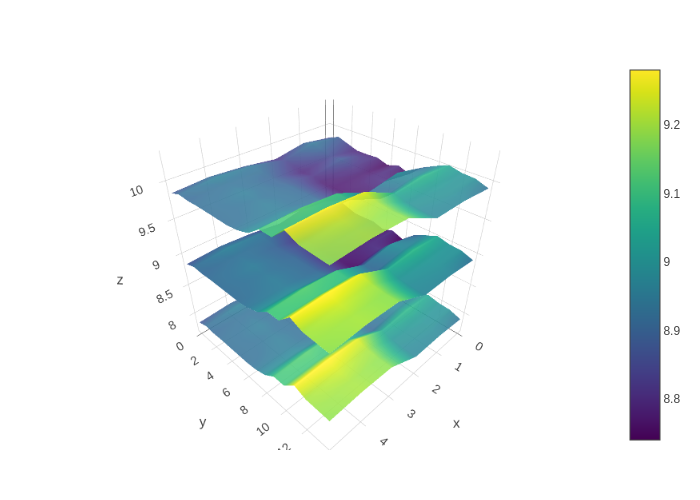

In [19]:
z1 = Vector[[8.83, 8.89, 8.81, 8.87, 8.9, 8.87],
                [8.89, 8.94, 8.85, 8.94, 8.96, 8.92],
                [8.84, 8.9, 8.82, 8.92, 8.93, 8.91],
                [8.79, 8.85, 8.79, 8.9, 8.94, 8.92],
                [8.79, 8.88, 8.81, 8.9, 8.95, 8.92],
                [8.8, 8.82, 8.78, 8.91, 8.94, 8.92],
                [8.75, 8.78, 8.77, 8.91, 8.95, 8.92],
                [8.8, 8.8, 8.77, 8.91, 8.95, 8.94],
                [8.74, 8.81, 8.76, 8.93, 8.98, 8.99],
                [8.89, 8.99, 8.92, 9.1, 9.13, 9.11],
                [8.97, 8.97, 8.91, 9.09, 9.11, 9.11],
                [9.04, 9.08, 9.05, 9.25, 9.28, 9.27],
                [9, 9.01, 9, 9.2, 9.23, 9.2],
                [8.99, 8.99, 8.98, 9.18, 9.2, 9.19],
                [8.93, 8.97, 8.97, 9.18, 9.2, 9.18]]
z2 = map(x->x.+1, z1)
z3 = map(x->x.-1, z1)
trace1 = surface(z=z1, colorscale="Viridis")
trace2 = surface(z=z2, showscale=false, opacity=0.9, colorscale="Viridis")
trace3 = surface(z=z3, showscale=false, opacity=0.9, colorscale="Viridis")
plot([trace1, trace2, trace3])

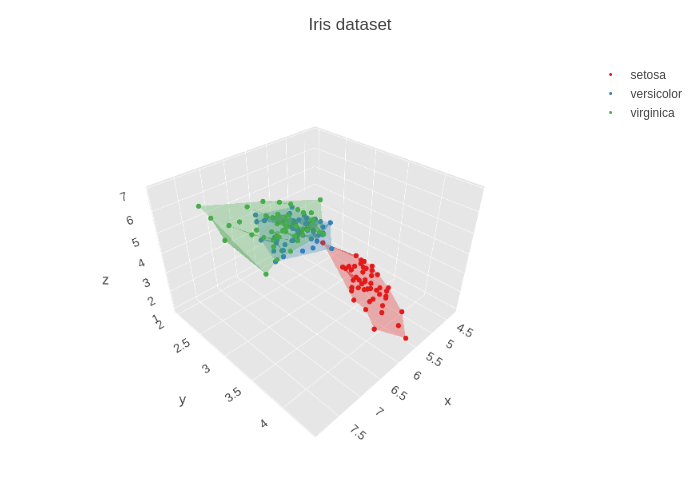

In [20]:
# load data
iris = dataset("datasets", "iris")
nms = unique(iris[:Species])
colors = [RGB(0.89, 0.1, 0.1), RGB(0.21, 0.50, 0.72), RGB(0.28, 0.68, 0.3)]

data = GenericTrace[]

for (i, nm) in enumerate(nms)
    df = iris[iris[:Species] .== nm, :]
    x=df[:SepalLength]
    y=df[:SepalWidth]
    z=df[:PetalLength]
    trace = scatter3d(;name=nm, mode="markers",
                       marker_size=3, marker_color=colors[i], marker_line_width=0,
                       x=x, y=y, z=z)
    push!(data, trace)

    cluster = mesh3d(;color=colors[i], opacity=0.3, x=x, y=y, z=z)
    push!(data, cluster)
end

# notice the nested attrs to create complex JSON objects
layout = Layout(width=800, height=550, autosize=false, title="Iris dataset",
                scene=attr(xaxis=attr(gridcolor="rgb(255, 255, 255)",
                                      zerolinecolor="rgb(255, 255, 255)",
                                      showbackground=true,
                                      backgroundcolor="rgb(230, 230,230)"),
                           yaxis=attr(gridcolor="rgb(255, 255, 255)",
                                       zerolinecolor="rgb(255, 255, 255)",
                                       showbackground=true,
                                       backgroundcolor="rgb(230, 230,230)"),
                           zaxis=attr(gridcolor="rgb(255, 255, 255)",
                                       zerolinecolor="rgb(255, 255, 255)",
                                       showbackground=true,
                                       backgroundcolor="rgb(230, 230,230)"),
                           aspectratio=attr(x=1, y=1, z=0.7),
                           aspectmode = "manual"))
plot(data, layout)

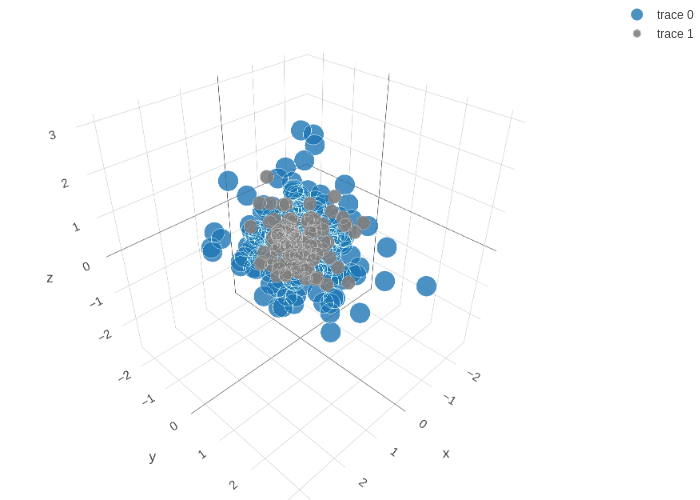

In [21]:
Σ = fill(0.5, 3, 3) + Diagonal([0.5, 0.5, 0.5])
obs1 = rand(MvNormal(zeros(3), Σ), 200)'
obs2 = rand(MvNormal(zeros(3), 0.5Σ), 100)'

trace1 = scatter3d(;x=obs1[:, 1], y=obs1[:, 2], z=obs1[:, 3],
                    mode="markers", opacity=0.8,
                    marker_size=12, marker_line_width=0.5,
                    marker_line_color="rgba(217, 217, 217, 0.14)")

trace2 = scatter3d(;x=obs2[:, 1], y=obs2[:, 2], z=obs2[:, 3],
                    mode="markers", opacity=0.9,
                    marker=attr(color="rgb(127, 127, 127)",
                                symbol="circle", line_width=1.0,
                                line_color="rgb(204, 204, 204)"))

layout = Layout(margin=attr(l=0, r=0, t=0, b=0))

plot([trace1, trace2], layout)

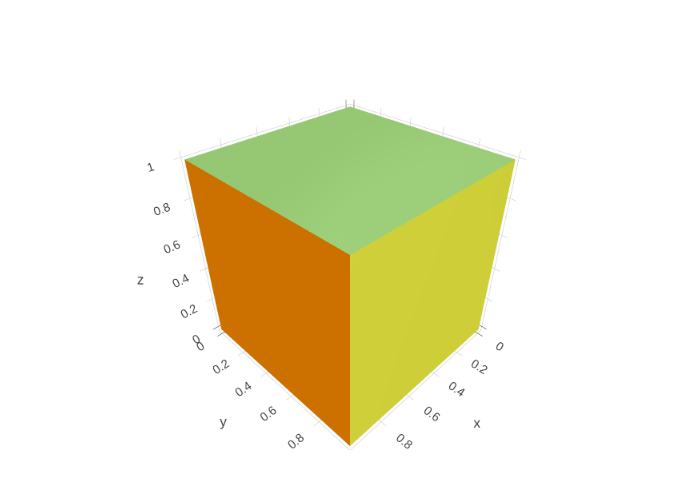

In [22]:
facecolor = repeat([
    "rgb(50, 200, 200)",
    "rgb(100, 200, 255)",
    "rgb(150, 200, 115)",
    "rgb(200, 200, 50)",
    "rgb(230, 200, 10)",
    "rgb(255, 140, 0)"
], inner=[2])

t = mesh3d(
    x=[0, 0, 1, 1, 0, 0, 1, 1],
    y=[0, 1, 1, 0, 0, 1, 1, 0],
    z=[0, 0, 0, 0, 1, 1, 1, 1],
    i=[7, 0, 0, 0, 4, 4, 2, 6, 4, 0, 3, 7],
    j=[3, 4, 1, 2, 5, 6, 5, 5, 0, 1, 2, 2],
    k=[0, 7, 2, 3, 6, 7, 1, 2, 5, 5, 7, 6],
    facecolor=facecolor)

plot(t)

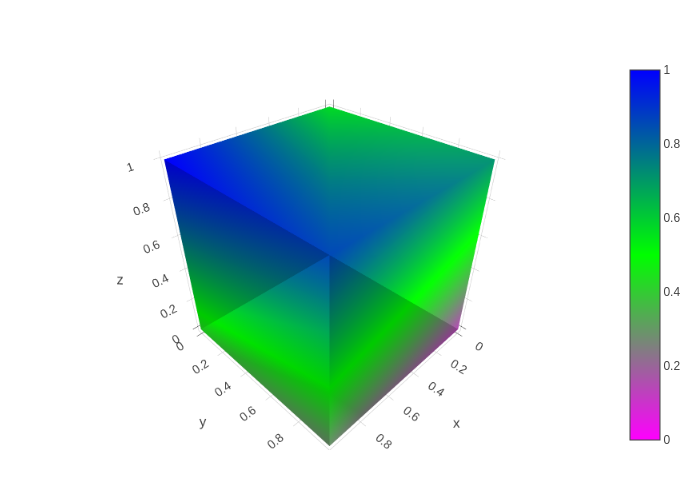

In [23]:
t = mesh3d(
    x=[0, 0, 1, 1, 0, 0, 1, 1],
    y=[0, 1, 1, 0, 0, 1, 1, 0],
    z=[0, 0, 0, 0, 1, 1, 1, 1],
    i=[7, 0, 0, 0, 4, 4, 6, 6, 4, 0, 3, 2],
    j=[3, 4, 1, 2, 5, 6, 5, 2, 0, 1, 6, 3],
    k=[0, 7, 2, 3, 6, 7, 1, 1, 5, 5, 7, 6],
    intensity=range(0, stop=1, length=8),
    colorscale=[
        [0, "rgb(255, 0, 255)"],
        [0.5, "rgb(0, 255, 0)"],
        [1, "rgb(0, 0, 255)"]
    ]
)
plot(t)